### Stanford Cars Dataset

In [1]:
from fastai.vision import *
from fastai.utils.ipython import * 

In [2]:
from fastai.callbacks.tracker import *

Download dataset and load labels.

In [ ]:
# !wget http://imagenet.stanford.edu/internal/car196/cars_train.tgz
# !wget https://ai.stanford.edu/~jkrause/cars/car_devkit.tgz

In [ ]:
# !tar xvf cars_train.tgz
# !tar xvf car_devkit.tgz

In [8]:
from scipy.io import loadmat
cars = loadmat('devkit/cars_meta.mat')
car_names = [c[0] for c in cars['class_names'][0]]

In [ ]:
cars_train = loadmat('devkit/cars_train_annos.mat')

In [52]:
labels = {c[-1][0]: car_names[c[-2][0][0]-1] for c in cars_train['annotations'][0]}

In [2]:
import pickle
with open('labels.pkl','rb') as f:
    labels = pickle.load(f)

Distribution seems fairly even.

(array([847., 829., 849., 800., 846., 789., 794., 774., 819., 797.]),
 array([  0. ,  19.5,  39. ,  58.5,  78. ,  97.5, 117. , 136.5, 156. , 175.5, 195. ]),
 <a list of 10 Patch objects>)

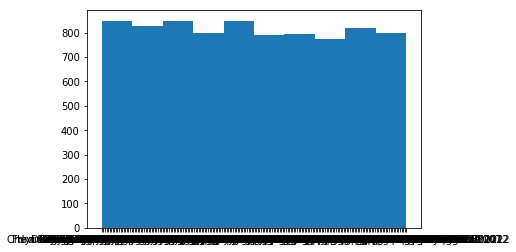

In [8]:
import matplotlib.pyplot as plt
plt.hist([b for a,b in labels.items()])

Datablock API Setup

In [5]:
path = Path('./')

In [ ]:
seed = 42
src = (ImageList
       .from_folder(path,include='cars_train',extensions='.jpg')
       .split_by_rand_pct(0.15,seed=42)
       .label_from_func(lambda x: labels[x.name])
      )

In [ ]:
data = (src
        .transform(get_transforms(),size=(224,244))
        .databunch()
        .normalize(imagenet_stats)
       )

In [8]:
# data.batch_size = 50

We use mixup for data augmentation.

In [9]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy).mixup()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 9.12E-03
Min loss divided by 10: 3.98E-03


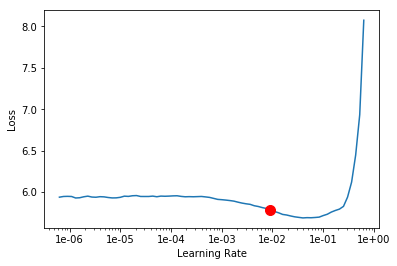

In [10]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [11]:
learn.fit_one_cycle(30,1e-2,callbacks=[SaveModelCallback(learn, every='improvement', monitor='accuracy', name='30_epoch_resnet50_224_frozen_2')])

epoch,train_loss,valid_loss,accuracy,time
0,5.184244,4.059735,0.144963,01:23
1,4.256169,2.957429,0.324324,01:22
2,3.579404,2.256933,0.442260,01:22
3,3.210415,2.044518,0.470106,01:22
4,3.106103,2.062215,0.451269,01:21
5,3.027825,1.932907,0.495495,01:22
6,2.967166,2.013168,0.478296,01:21
7,2.909703,1.966746,0.511876,01:21
8,2.805059,1.780585,0.546274,01:22
9,2.709395,1.714636,0.540541,01:23


Better model found at epoch 0 with accuracy value: 0.14496314525604248.
Better model found at epoch 1 with accuracy value: 0.3243243098258972.
Better model found at epoch 2 with accuracy value: 0.4422604441642761.
Better model found at epoch 3 with accuracy value: 0.47010648250579834.
Better model found at epoch 5 with accuracy value: 0.4954954981803894.
Better model found at epoch 7 with accuracy value: 0.5118755102157593.
Better model found at epoch 8 with accuracy value: 0.5462735295295715.
Better model found at epoch 10 with accuracy value: 0.6068795919418335.
Better model found at epoch 12 with accuracy value: 0.6199836134910583.
Better model found at epoch 13 with accuracy value: 0.7215397357940674.
Better model found at epoch 15 with accuracy value: 0.7411957383155823.
Better model found at epoch 16 with accuracy value: 0.7477477192878723.
Better model found at epoch 17 with accuracy value: 0.7936117649078369.
Better model found at epoch 20 with accuracy value: 0.815724790096283

In [12]:
learn.save('1_freeze_224_resnet50_2')

In [ ]:
learn.load('1_freeze_224_resnet50_2')

Unfreeze pretrained weights.

In [14]:
learn.unfreeze()
learn.fit_one_cycle(15, slice(1e-5,1e-3),callbacks=[SaveModelCallback(learn, every='improvement', monitor='accuracy', name='15_epoch_resnet50_224_unfrozen_2')]),

epoch,train_loss,valid_loss,accuracy,time
0,1.666261,0.654496,0.839476,01:45
1,1.678186,0.682057,0.823096,01:43
2,1.664840,0.725491,0.818182,01:44
3,1.717995,0.744221,0.822277,01:43
4,1.707142,0.707302,0.822277,01:43
5,1.689188,0.671065,0.831286,01:44
6,1.671552,0.625474,0.840295,01:44
7,1.619934,0.617975,0.851761,01:44
8,1.602341,0.590118,0.861589,01:44
9,1.549968,0.574937,0.864865,01:44


Better model found at epoch 0 with accuracy value: 0.8394758105278015.
Better model found at epoch 6 with accuracy value: 0.8402948379516602.
Better model found at epoch 7 with accuracy value: 0.8517608642578125.
Better model found at epoch 8 with accuracy value: 0.8615888357162476.
Better model found at epoch 9 with accuracy value: 0.8648648858070374.
Better model found at epoch 10 with accuracy value: 0.872235894203186.
Better model found at epoch 11 with accuracy value: 0.8730548620223999.
Better model found at epoch 12 with accuracy value: 0.8804258704185486.


(None,)

In [ ]:
learn.load('15_epoch_resnet50_224_unfrozen_2')

In [16]:
learn.save('final_resnet50_224')

## Increasing Image Size

In [6]:
data = (src
        .transform(get_transforms(),size=(299,299))
        .databunch(bs=40)
        .normalize(imagenet_stats)
       )

In [7]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy).mixup()

In [ ]:
learn.load('final_resnet50_224')

In [9]:
learn.unfreeze()
learn.fit_one_cycle(15, slice(1e-6,1e-4),callbacks=[SaveModelCallback(learn, every='improvement', monitor='accuracy', name='20_epoch_resnet50_299_unfrozen_2')]),

epoch,train_loss,valid_loss,accuracy,time
0,1.548309,0.498105,0.885340,03:02
1,1.526852,0.472578,0.891892,02:55
2,1.515516,0.450608,0.889435,02:55
3,1.477754,0.440078,0.890254,02:54
4,1.454805,0.446250,0.891892,02:55
5,1.467579,0.440182,0.899263,02:55
6,1.454459,0.435140,0.900082,02:56
7,1.456850,0.434558,0.895987,02:56
8,1.436187,0.426848,0.899263,02:56
9,1.465707,0.422785,0.899263,02:56


Better model found at epoch 0 with accuracy value: 0.8853398561477661.
Better model found at epoch 1 with accuracy value: 0.8918918967247009.
Better model found at epoch 5 with accuracy value: 0.8992629051208496.
Better model found at epoch 6 with accuracy value: 0.9000818729400635.
Better model found at epoch 10 with accuracy value: 0.9025388956069946.
Better model found at epoch 13 with accuracy value: 0.9033579230308533.


(None,)

In [34]:
learn.save('final_resnet50_224')


# What if I increase it again?

In [7]:
data = (src
        .transform(get_transforms(),size=(400,400))
        .databunch(bs=22)
        .normalize(imagenet_stats)
       )

In [8]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy).mixup()

In [ ]:
learn.load('final_resnet50_224')


In [10]:
learn.unfreeze()
learn.fit_one_cycle(15, slice(1e-6,1e-4),callbacks=[SaveModelCallback(learn, every='improvement', monitor='accuracy', name='15_epoch_resnet50_400_unfrozen_2')]),

epoch,train_loss,valid_loss,accuracy,time
0,1.650116,0.532162,0.873874,05:03
1,1.632420,0.483278,0.887797,04:56
2,1.581860,0.445992,0.892711,04:56
3,1.548177,0.437897,0.898444,04:56
4,1.487543,0.425511,0.891073,04:57
5,1.530809,0.412388,0.896806,04:56
6,1.509757,0.401470,0.907453,04:57
7,1.493426,0.404082,0.903358,04:56
8,1.482676,0.395574,0.904996,04:56
9,1.524782,0.391629,0.900901,04:56


Better model found at epoch 0 with accuracy value: 0.8738738894462585.
Better model found at epoch 1 with accuracy value: 0.8877968788146973.
Better model found at epoch 2 with accuracy value: 0.8927108645439148.
Better model found at epoch 3 with accuracy value: 0.898443877696991.
Better model found at epoch 6 with accuracy value: 0.9074528813362122.


(None,)

Maybe we can do better?